# Task 1
Implement the Adaboost algorithm yourself from scratch.

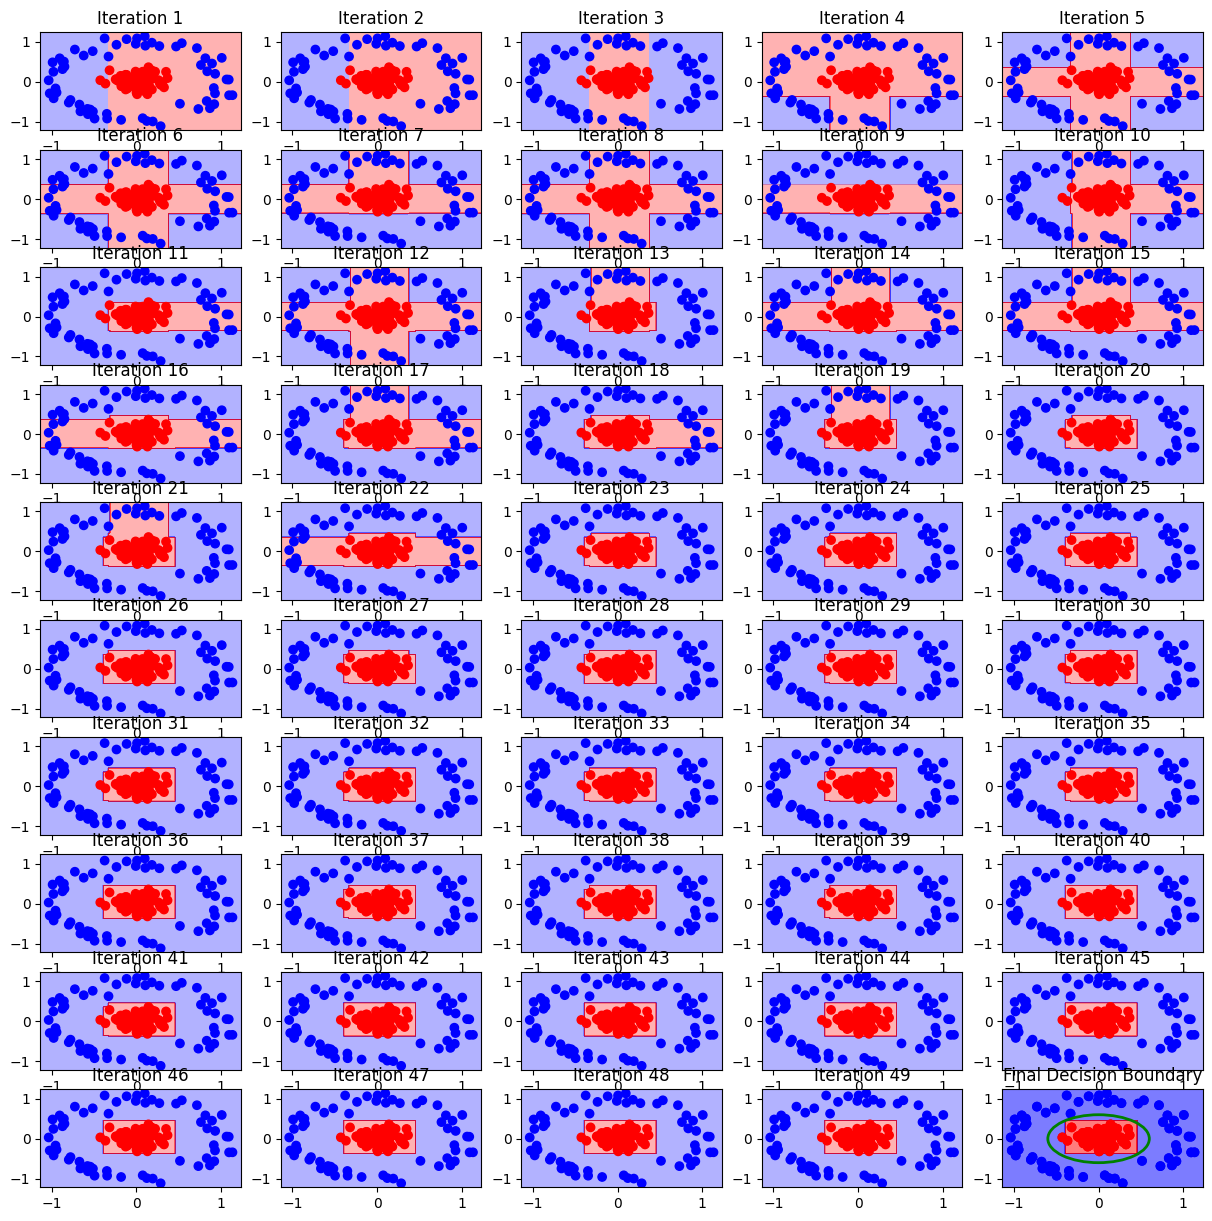



Final Accuracy: 0.992


In [37]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import accuracy_score

# Step 1: Generate the circles dataset
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Convert labels from {0, 1} to {-1, 1} for Adaboost compatibility
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

# Step 2: Implement AdaBoost with deeper decision trees to capture circular patterns
class AdaBoostCustom:
    def __init__(self, weak_classifier=DecisionTreeClassifier, n_estimators=50, eta=0.5, max_depth=1):
        self.weak_classifier = weak_classifier
        self.n_estimators = n_estimators
        self.eta = eta
        self.max_depth = max_depth
        self.alphas = []
        self.classifiers = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        # Initialize weights
        w = np.ones(n_samples) / n_samples

        for t in range(self.n_estimators):
            # Train weak classifier (now with higher max_depth to capture non-linearity)
            clf = self.weak_classifier(max_depth=self.max_depth)
            clf.fit(X, y, sample_weight=w)
            y_pred = clf.predict(X)

            # Compute weighted error
            error = np.dot(w, (y_pred != y))
            if error > 0.5:
                break

            # Compute alpha
            alpha = self.eta * np.log((1 - error) / error)
            self.alphas.append(alpha)
            self.classifiers.append(clf)

            # Update weights
            w *= np.exp(alpha * (y_pred != y))
            w /= np.sum(w)  # Normalize weights

    def predict(self, X):
        # Initialize predictions
        final_pred = np.zeros(X.shape[0])

        for alpha, clf in zip(self.alphas, self.classifiers):
            final_pred += alpha * clf.predict(X)

        return np.sign(final_pred)

# Step 3: Visualize decision boundaries
def plot_decision_boundary(clf, X, y, ax=None, title=""):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, alpha=0.3, cmap=colors.ListedColormap(["blue", "red"]))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=colors.ListedColormap(["blue", "red"]))
    ax.set_title(title)

# Step 4: Circle boundary visualization
def plot_circle_boundary(ax):
    # Add a green circle as boundary
    circle = plt.Circle((0, 0), 0.6, color='green', fill=False, linewidth=2, label="True Circle Boundary")
    ax.add_artist(circle)

# Instantiate the AdaBoost algorithm with deeper decision trees
ada_boost = AdaBoostCustom(n_estimators=50, eta=0.5, max_depth=1)

# Train AdaBoost
ada_boost.fit(X_train, y_train)

# Visualize the decision boundary at each iteration and final decision boundary
fig, axes = plt.subplots(10, 5, figsize=(15, 15))
axes = axes.ravel()

for t in range(ada_boost.n_estimators):
    ada_boost_iter = AdaBoostCustom(n_estimators=t + 1, eta=0.5, max_depth=1)
    ada_boost_iter.fit(X_train, y_train)
    plot_decision_boundary(ada_boost_iter, X_test, y_test, ax=axes[t], title=f"Iteration {t+1}")
    #plot_circle_boundary(axes[t])  # Add circle boundary

# Final decision boundary visualization
plot_decision_boundary(ada_boost, X_test, y_test, ax=axes[-1], title="Final Decision Boundary")
plot_circle_boundary(axes[-1])  # Add circle boundary
plt.show()

# Check final accuracy
print("\n")
y_pred = ada_boost.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))


# Task 2
Run your Adaboost implementation with several weak classifiers such as LogReg, DecisionStump,
DecisionTree(depth=3), Linear SVM, and LDA.  Tune the method’s hyperparameters (both Adaboost
and the underlying weak classifier) for maximizing the classification performance.  Based on the data
visualization, you can achieve >98% performance fairly easily.  Generate the decision boundary
visualizations as the above figure pair for each model class.


Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1} with accuracy: 0.9280
Tuning eta for Logistic Regression with best params: {'C': 1}...
Parameters: {'C': 1}, eta: 0.1, Accuracy: 0.4880, Error: 0.5120
Parameters: {'C': 1}, eta: 0.5, Accuracy: 0.9280, Error: 0.0720
Parameters: {'C': 1}, eta: 1, Accuracy: 0.4880, Error: 0.5120
Best eta for Logistic Regression: 0.5 with accuracy: 0.9280


Tuning hyperparameters for Decision Stump...
Best parameters for Decision Stump: {} with accuracy: 0.9920
Tuning eta for Decision Stump with best params: {}...
Parameters: {}, eta: 0.1, Accuracy: 0.9520, Error: 0.0480
Parameters: {}, eta: 0.5, Accuracy: 0.9920, Error: 0.0080
Parameters: {}, eta: 1, Accuracy: 0.7600, Error: 0.2400
Best eta for Decision Stump: 0.5 with accuracy: 0.9920


Tuning hyperparameters for Decision Tree (depth=3)...
Best parameters for Decision Tree (depth=3): {} with accuracy: 0.9920
Tuning eta for Decision Tree (depth=3) with best

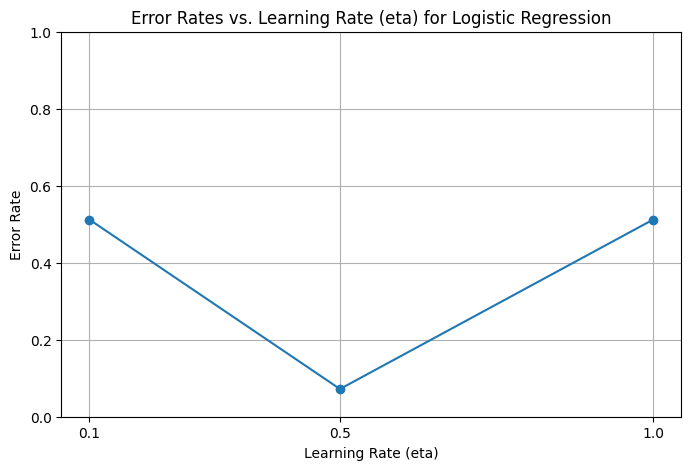

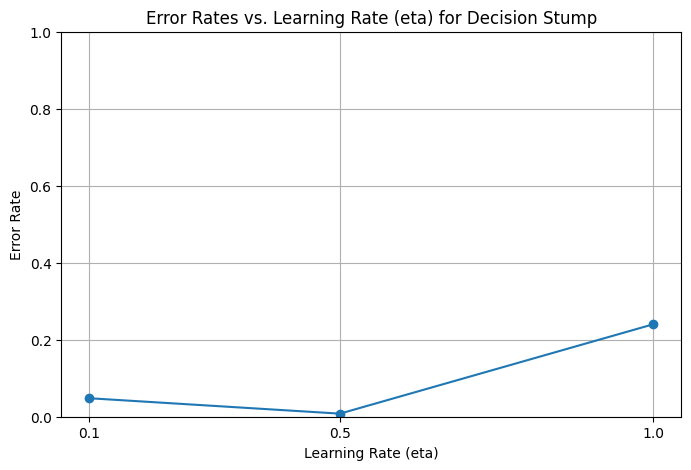

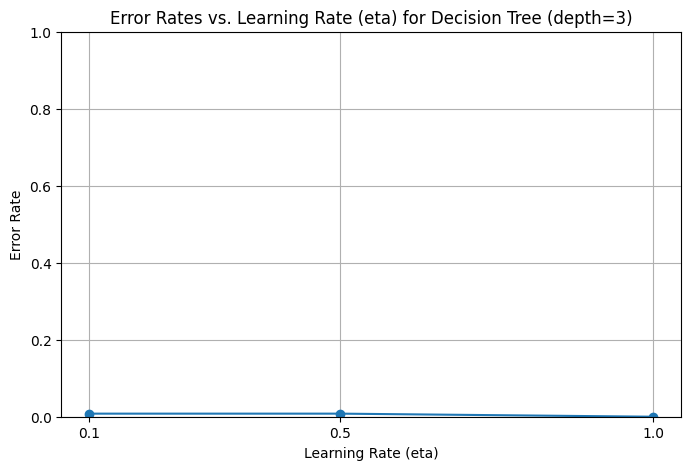

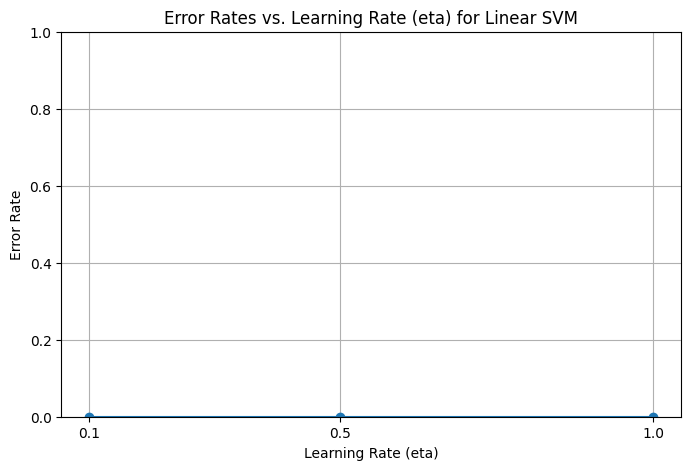

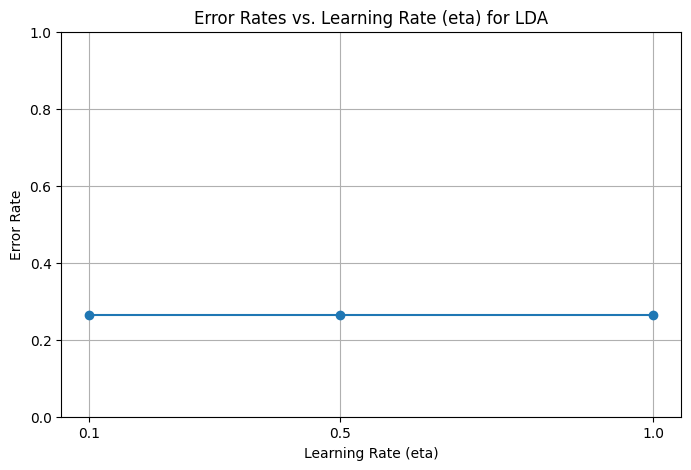

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generate the circles dataset
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Helper function to calculate weighted error
def weighted_error(y_true, y_pred, weights):
    return np.sum(weights * (y_true != y_pred))

# Adaboost implementation
class AdaBoost:
    def __init__(self, learner_name, weak_learner, T=50, eta=0.5):
        self.weak_learner = weak_learner
        self.learner_name = learner_name
        self.T = T
        self.eta = eta
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.full(n_samples, 1/n_samples)

        for t in range(self.T):
            model = self.weak_learner()
            if self.learner_name != "LDA":
                model.fit(X, y, sample_weight=weights)  # Always fit with sample weights
            else:
                model.fit(X, y)  # Always fit without sample weights
            y_pred = model.predict(X)

            error = weighted_error(y, y_pred, weights) / np.sum(weights)
            alpha_t = self.eta * np.log((1 - error) / (error + 1e-10))
            self.alphas.append(alpha_t)
            self.models.append(model)

            # Update weights
            weights *= np.exp(-alpha_t * y * y_pred)
            weights /= np.sum(weights)  # Normalize

    def predict(self, X):
        final_pred = np.zeros(X.shape[0])
        for alpha, model in zip(self.alphas, self.models):
            final_pred += alpha * model.predict(X)
        return np.sign(final_pred)

# Function to tune hyperparameters for a specific weak learner
def tune_hyperparameters(learner_name, weak_learner, param_grid):
    best_accuracy = 0
    best_params = None

    for params in param_grid:
        adaboost = AdaBoost(learner_name=learner_name, weak_learner=lambda: weak_learner(**params), T=50, eta=params.get('eta', 0.5))
        adaboost.fit(X_train, y_train)
        y_pred = adaboost.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params

    print(f"Best parameters for {learner_name}: {best_params} with accuracy: {best_accuracy:.4f}")

    return best_params  # Return best parameters

# Function to find the best eta using the best estimator
def tune_eta(learner_name, weak_learner, best_params, eta_values):
    best_accuracy = 0
    best_eta = None
    errors = []

    for eta in eta_values:
        adaboost = AdaBoost(learner_name=learner_name, weak_learner=lambda: weak_learner(**best_params), T=50, eta=eta)
        adaboost.fit(X_train, y_train)
        y_pred = adaboost.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error = 1 - accuracy

        errors.append((eta, error))  # Store eta and corresponding error

        print(f"Parameters: {best_params}, eta: {eta}, Accuracy: {accuracy:.4f}, Error: {error:.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_eta = eta

    print(f"Best eta for {learner_name}: {best_eta} with accuracy: {best_accuracy:.4f}")
    print("\n")

    return best_eta, errors  # Return best eta and errors for plotting

# Define weak learners with hyperparameter grids
weak_learners_params = {
    "Logistic Regression": lambda **params: LogisticRegression(solver='lbfgs', max_iter=1000, C=params.get('C', 1.0)),
    "Decision Stump": lambda **params: DecisionTreeClassifier(max_depth=1),
    "Decision Tree (depth=3)": lambda **params: DecisionTreeClassifier(max_depth=3),
    "Linear SVM": lambda **params: SVC(kernel='rbf', probability=True, C=params.get('C', 1)),
    "LDA": lambda **params: LinearDiscriminantAnalysis(),
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": [{'C': c} for c in [0.1, 1, 10]],
    "Decision Stump": [{}],
    "Decision Tree (depth=3)": [{}],
    "Linear SVM": [{'C': c} for c in [0.1, 1, 10]],
    "LDA": [{}],
}

# Eta values for tuning
eta_values = [0.1, 0.5, 1]

# Dictionary to hold best parameters and errors for plotting
all_best_params = {}
all_errors = {}

# Run tuning for each weak learner to find best hyperparameters and then best eta
for learner_name, weak_learner in weak_learners_params.items():
    print(f"Tuning hyperparameters for {learner_name}...")
    best_params = tune_hyperparameters(learner_name, weak_learner, param_grids[learner_name])

    print(f"Tuning eta for {learner_name} with best params: {best_params}...")
    best_eta, errors = tune_eta(learner_name, weak_learner, best_params, eta_values)

    all_best_params[learner_name] = (best_params, best_eta)  # Store best parameters and eta
    all_errors[learner_name] = errors  # Store errors for plotting

# Plotting separate error plots for each algorithm
for learner_name, errors in all_errors.items():
    plt.figure(figsize=(8, 5))
    eta_values = [error[0] for error in errors]
    error_rates = [error[1] for error in errors]

    plt.plot(eta_values, error_rates, marker='o')
    plt.title(f'Error Rates vs. Learning Rate (eta) for {learner_name}')
    plt.xlabel('Learning Rate (eta)')
    plt.ylabel('Error Rate')
    plt.xticks(np.unique(eta_values))  # Unique eta values
    plt.grid()
    plt.ylim(0, 1)
    plt.show()

for i, (learner_name, (best_params, best_eta)) in enumerate(all_best_params.items()):
    # Create the model with the best parameters and best eta
    if learner_name == "LDA":
        model = weak_learners_params[learner_name]()
    else:
        model = weak_learners_params[learner_name](**best_params)

    model.fit(X_train, y_train)  # Fit the model to the training data

plt.tight_layout()
plt.show()


Code for Deicsion boundary and plot for error rate vs eta for different algorithm

Tuning hyperparameters for Logistic Regression...


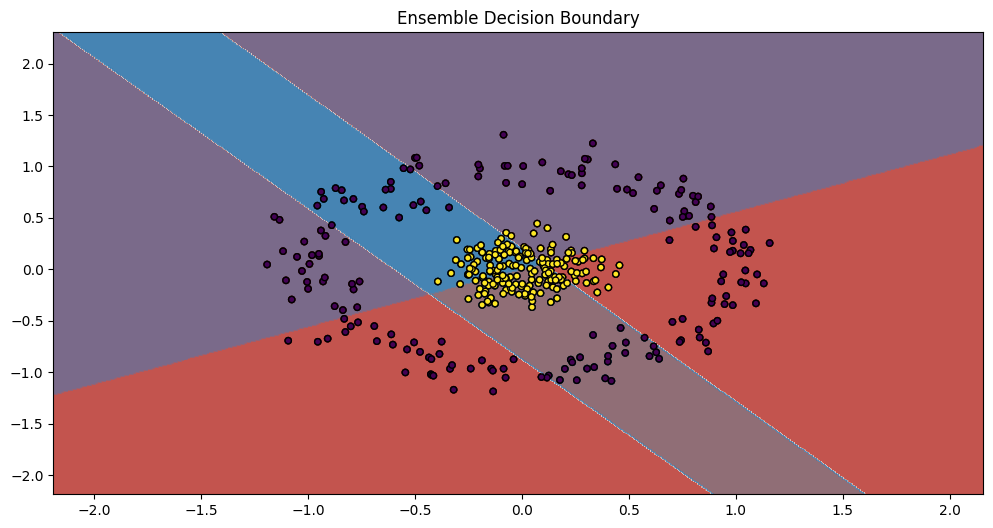

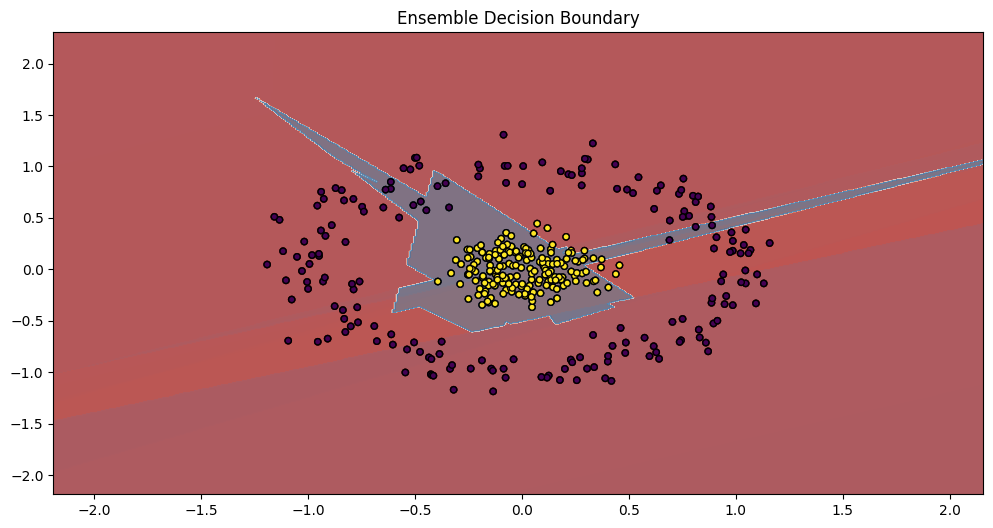

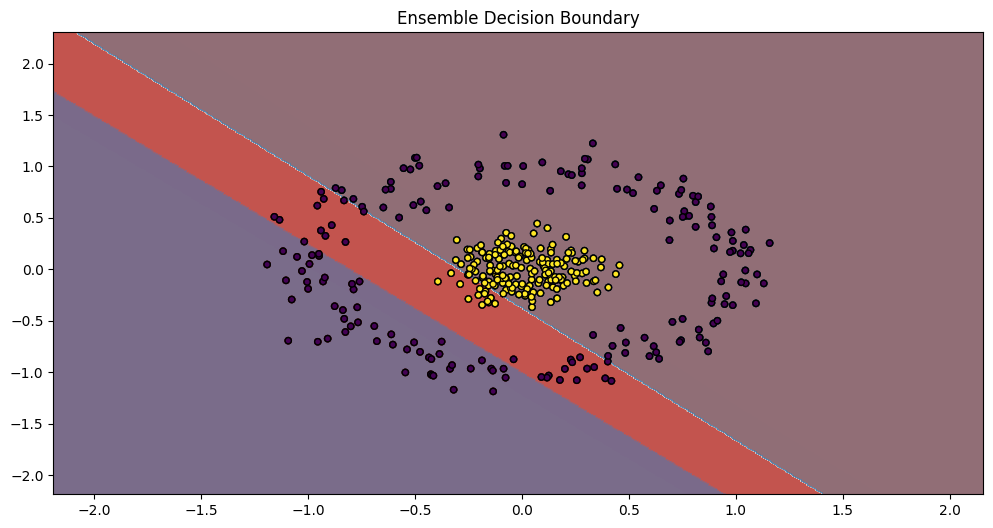

Best parameters for Logistic Regression: {'C': 1} with accuracy: 0.9280
Tuning eta for Logistic Regression with best params: {'C': 1}...


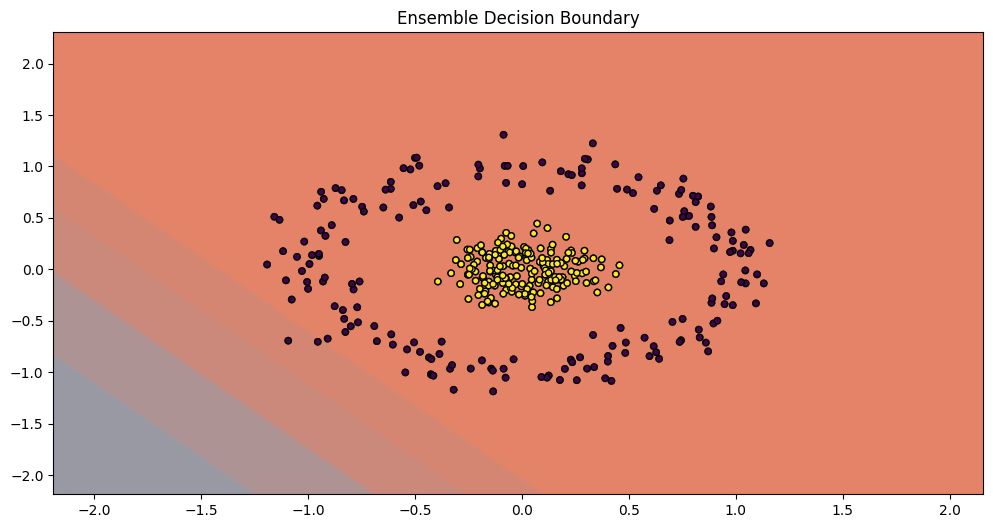

Parameters: {'C': 1}, eta: 0.1, Accuracy: 0.4880, Error: 0.5120


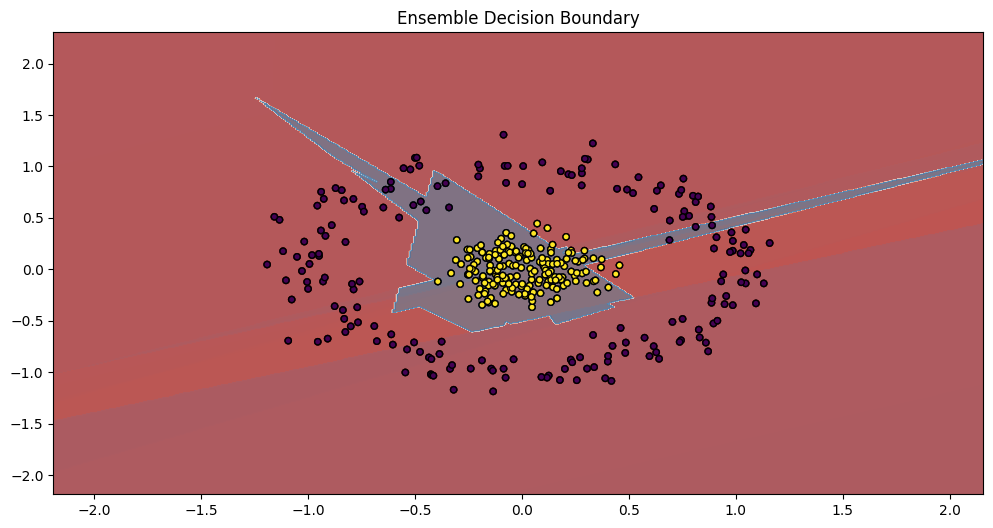

Parameters: {'C': 1}, eta: 0.5, Accuracy: 0.9280, Error: 0.0720


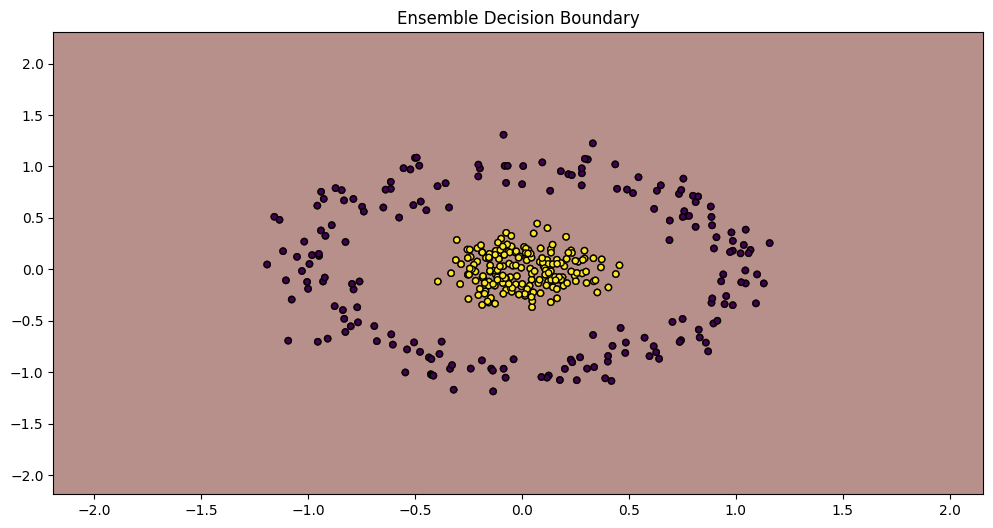

Parameters: {'C': 1}, eta: 1, Accuracy: 0.4880, Error: 0.5120
Best eta for Logistic Regression: 0.5 with accuracy: 0.9280


Tuning hyperparameters for Decision Stump...


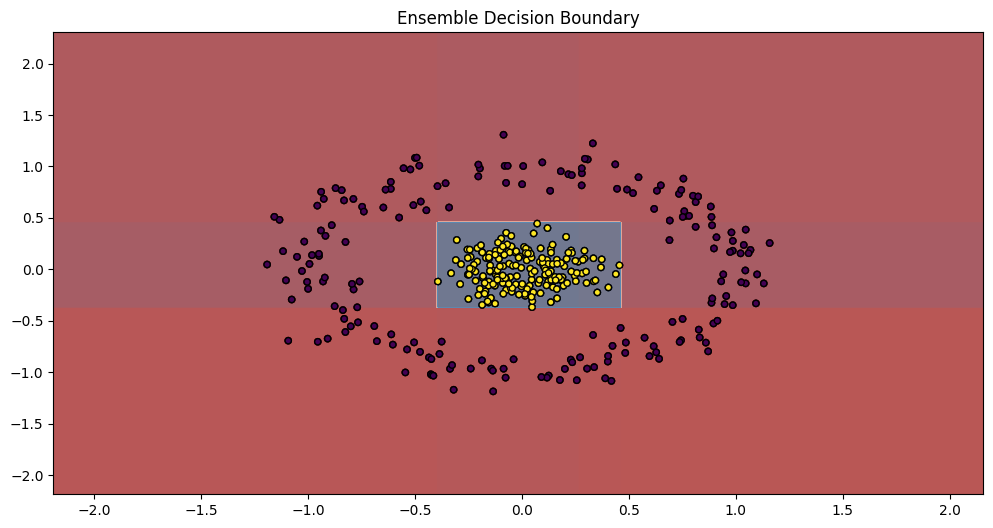

Best parameters for Decision Stump: {} with accuracy: 0.9920
Tuning eta for Decision Stump with best params: {}...


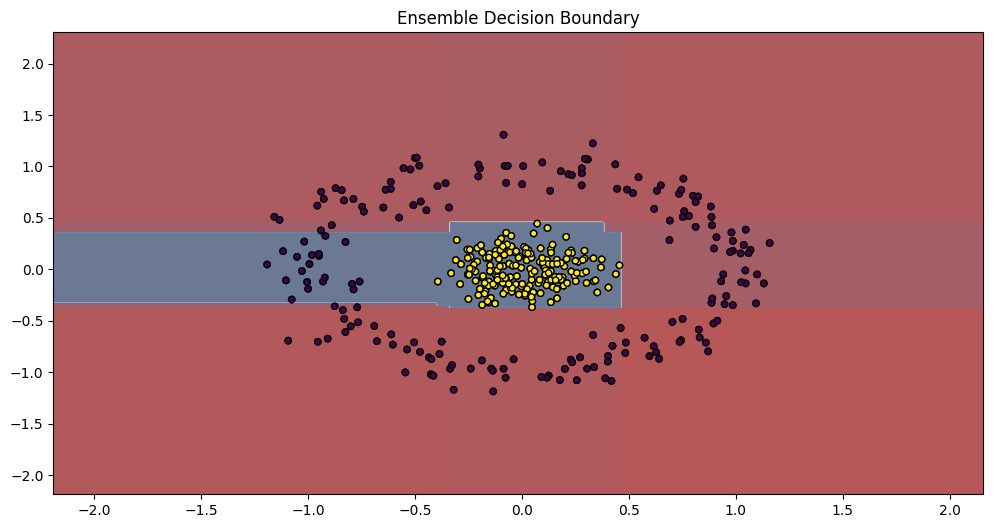

Parameters: {}, eta: 0.1, Accuracy: 0.9520, Error: 0.0480


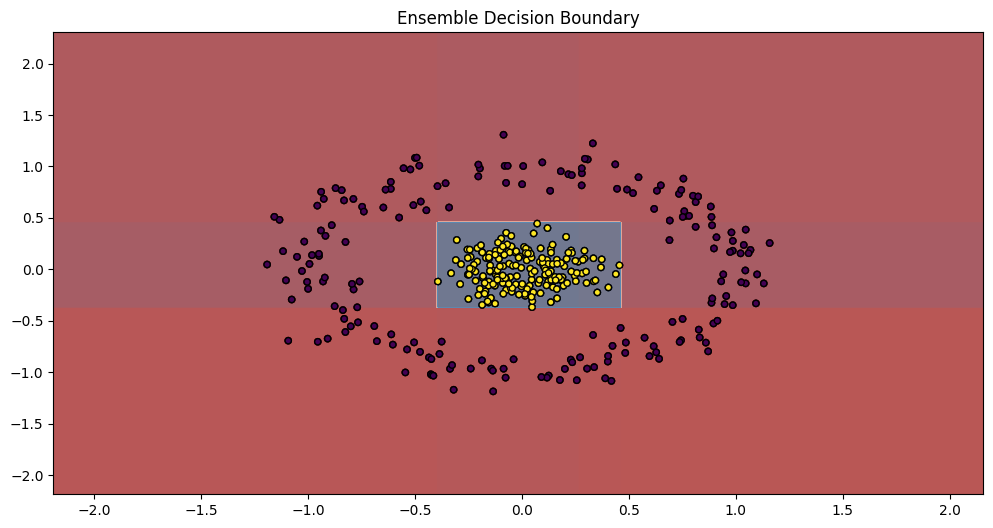

Parameters: {}, eta: 0.5, Accuracy: 0.9920, Error: 0.0080


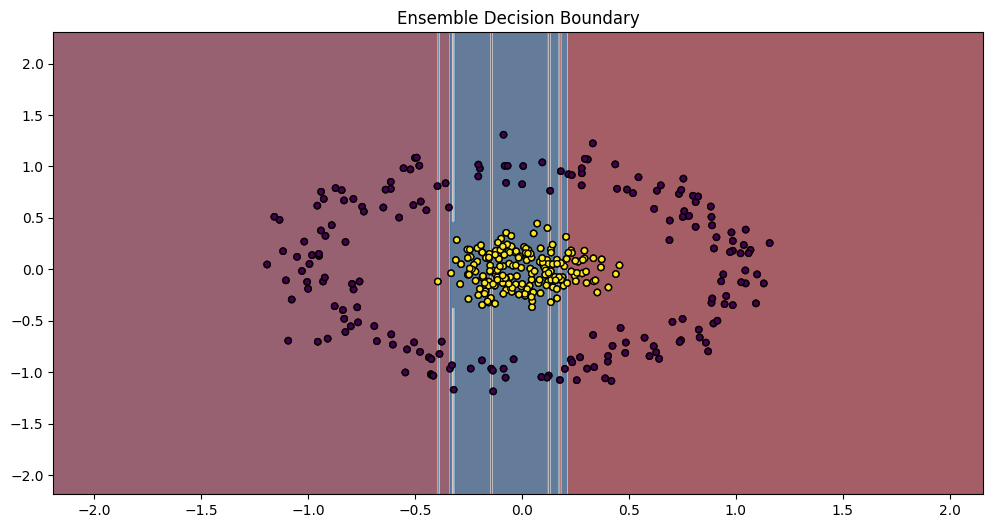

Parameters: {}, eta: 1, Accuracy: 0.7600, Error: 0.2400
Best eta for Decision Stump: 0.5 with accuracy: 0.9920


Tuning hyperparameters for Decision Tree (depth=3)...


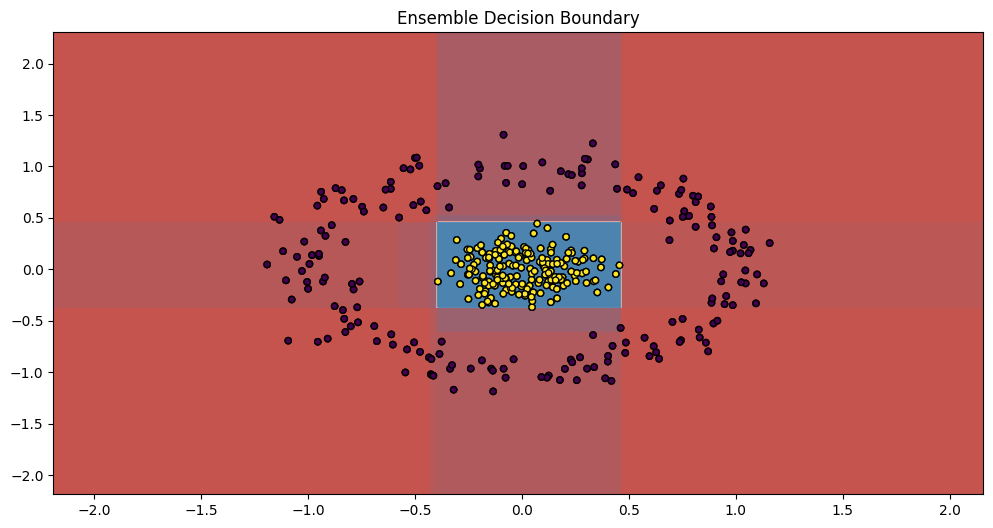

Best parameters for Decision Tree (depth=3): {} with accuracy: 0.9920
Tuning eta for Decision Tree (depth=3) with best params: {}...


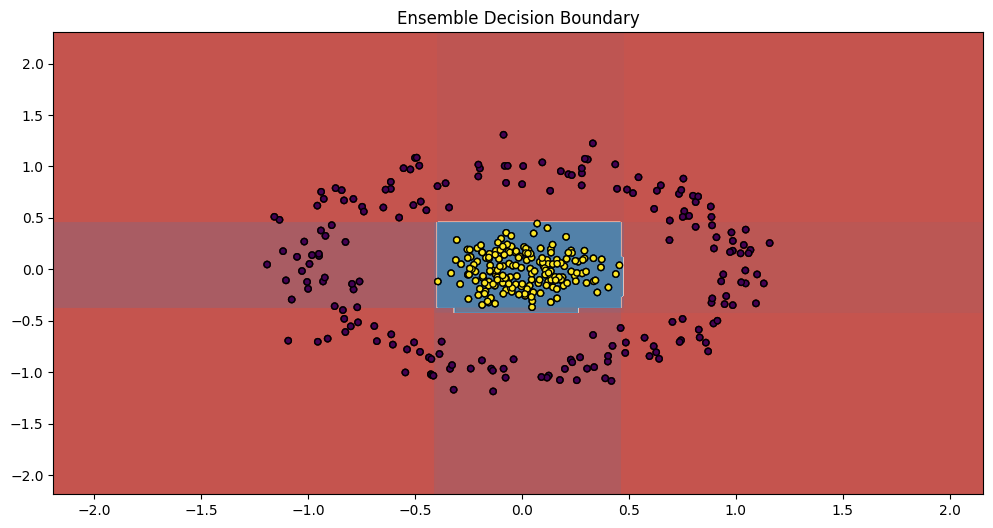

Parameters: {}, eta: 0.1, Accuracy: 0.9920, Error: 0.0080


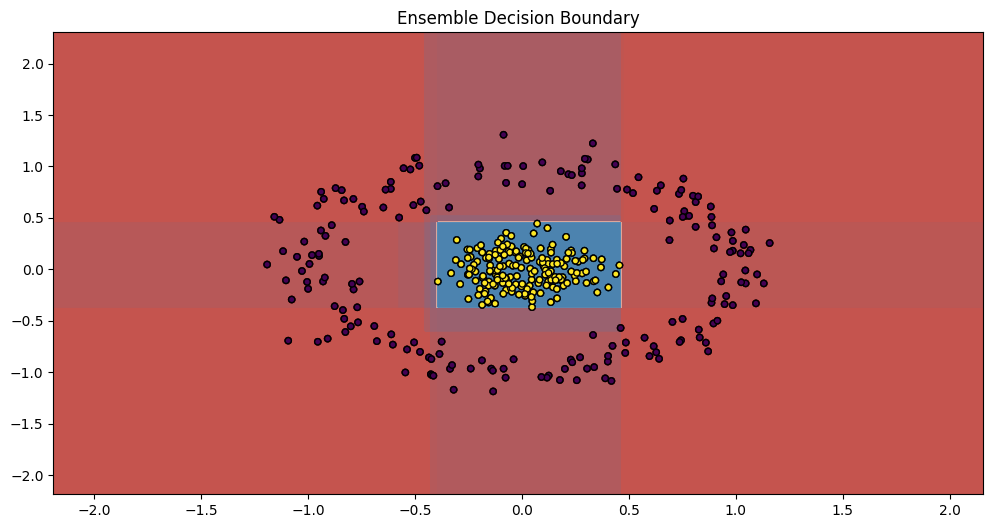

Parameters: {}, eta: 0.5, Accuracy: 0.9920, Error: 0.0080


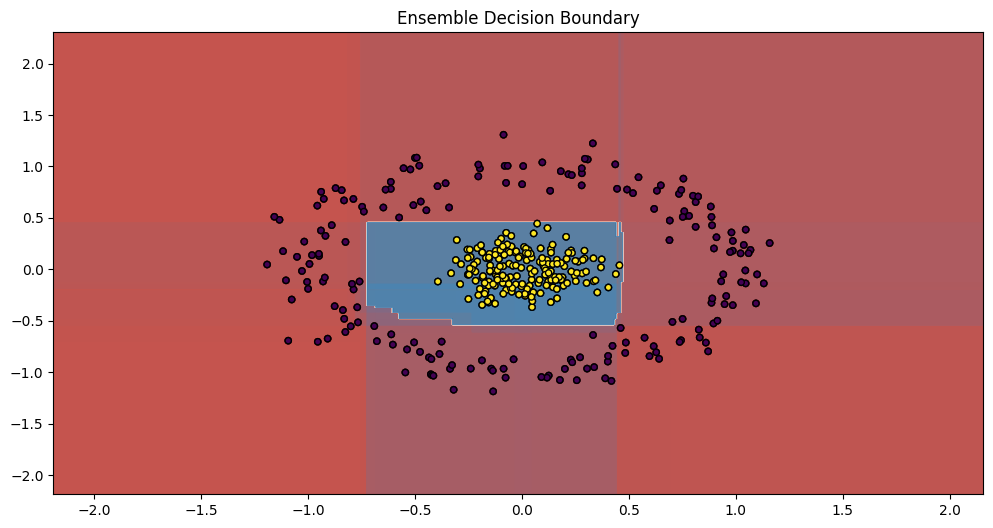

Parameters: {}, eta: 1, Accuracy: 1.0000, Error: 0.0000
Best eta for Decision Tree (depth=3): 1 with accuracy: 1.0000


Tuning hyperparameters for Linear SVM...


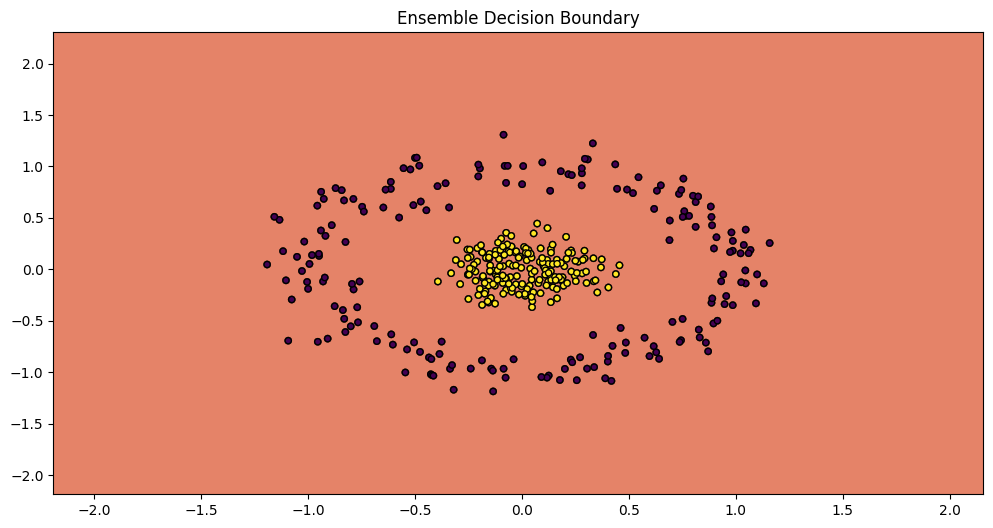

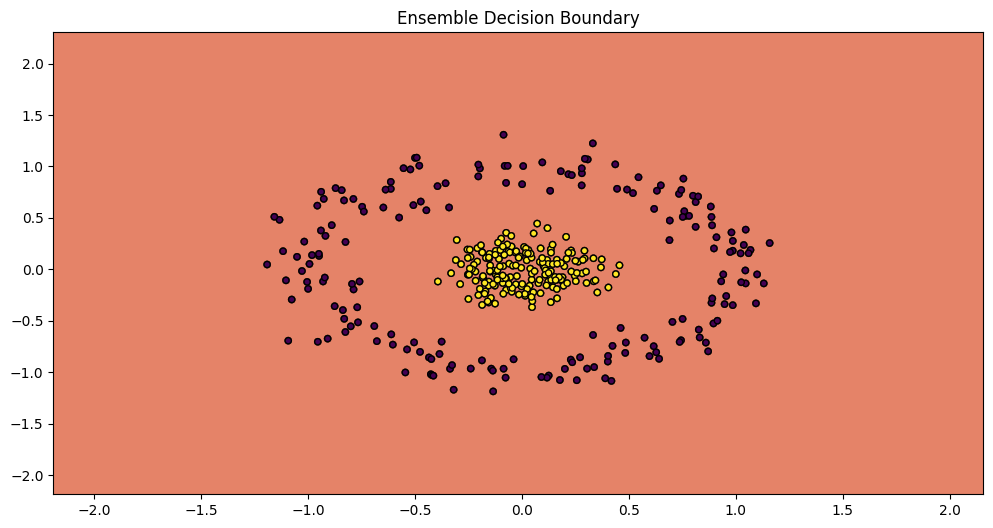

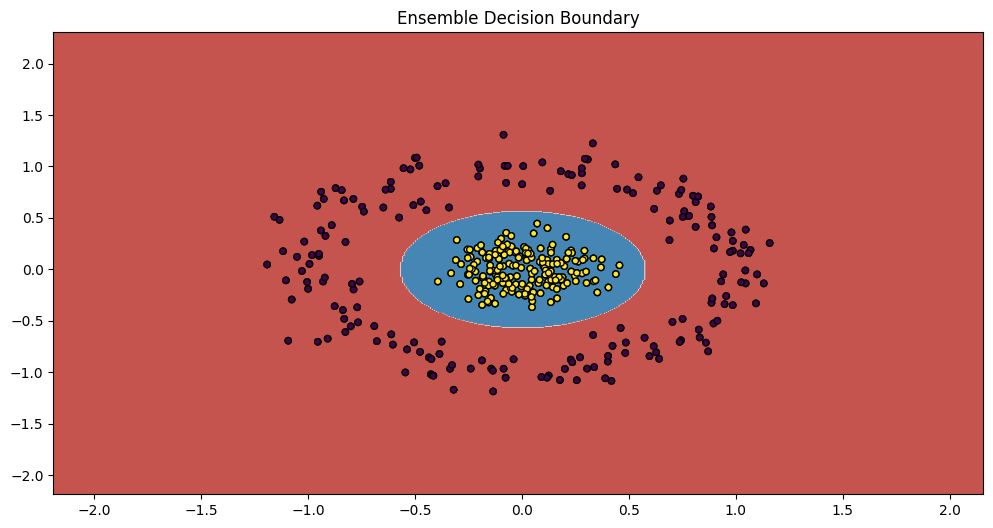

Best parameters for Linear SVM: {'C': 10} with accuracy: 1.0000
Tuning eta for Linear SVM with best params: {'C': 10}...


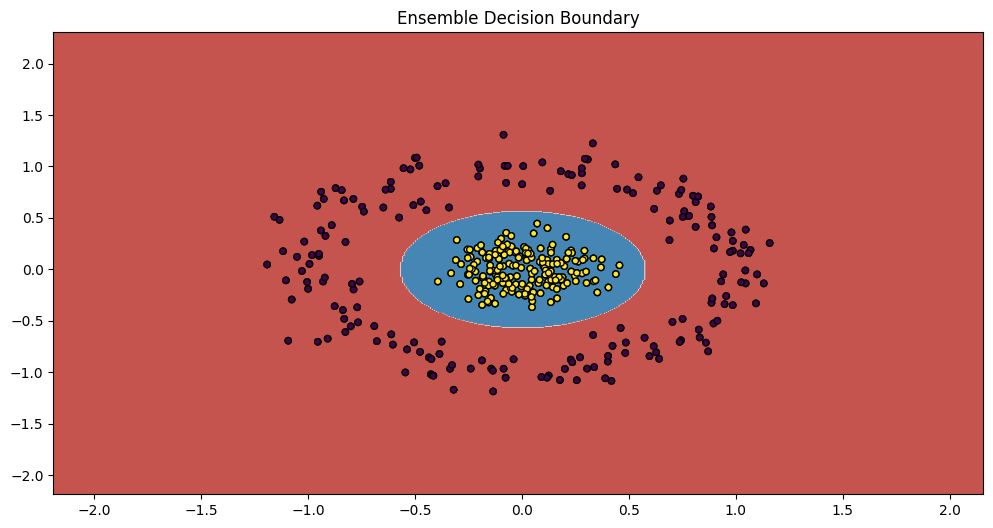

Parameters: {'C': 10}, eta: 0.1, Accuracy: 1.0000, Error: 0.0000


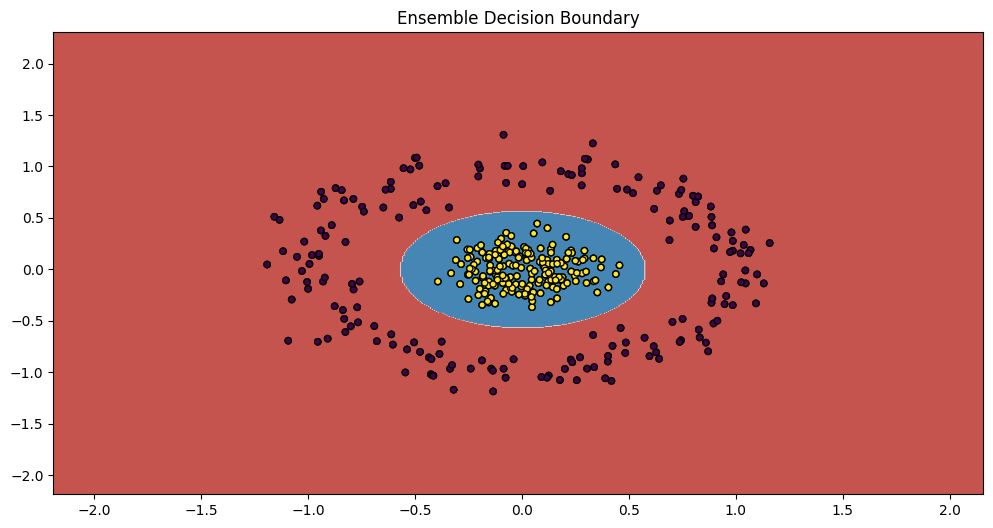

Parameters: {'C': 10}, eta: 0.5, Accuracy: 1.0000, Error: 0.0000


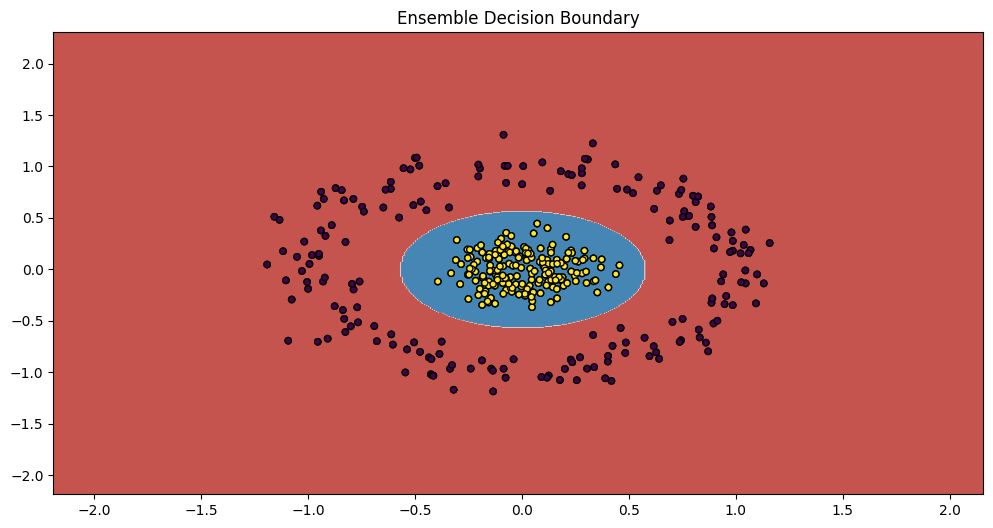

Parameters: {'C': 10}, eta: 1, Accuracy: 1.0000, Error: 0.0000
Best eta for Linear SVM: 0.1 with accuracy: 1.0000


Tuning hyperparameters for LDA...


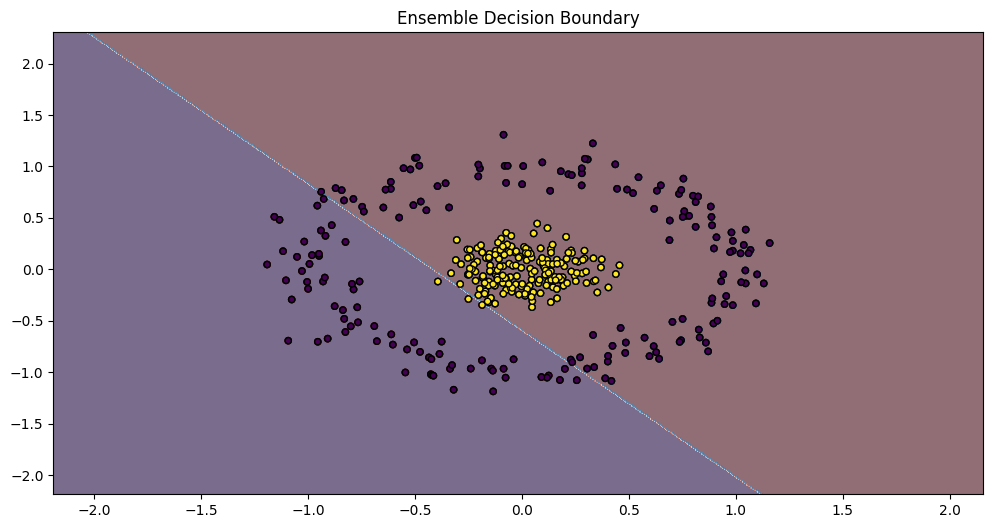

Best parameters for LDA: {} with accuracy: 0.7360
Tuning eta for LDA with best params: {}...


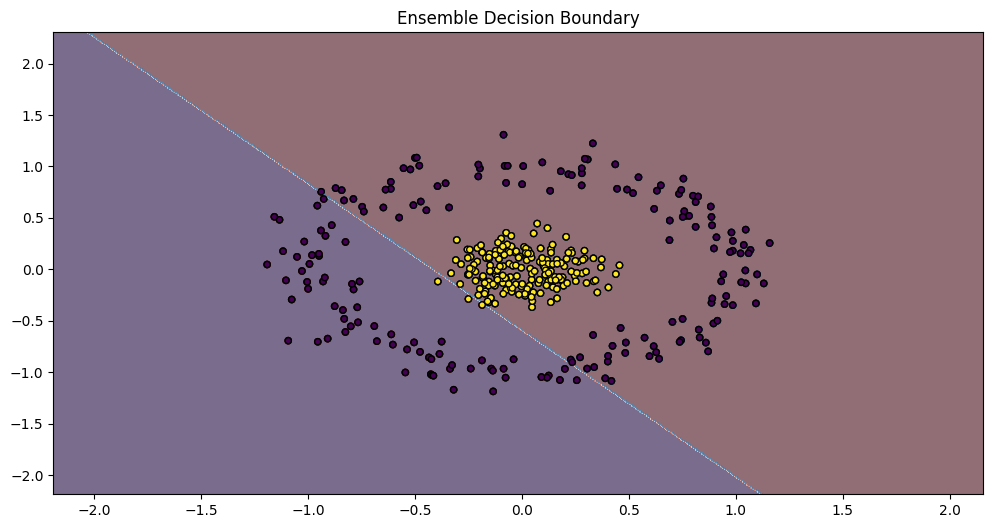

Parameters: {}, eta: 0.1, Accuracy: 0.7360, Error: 0.2640


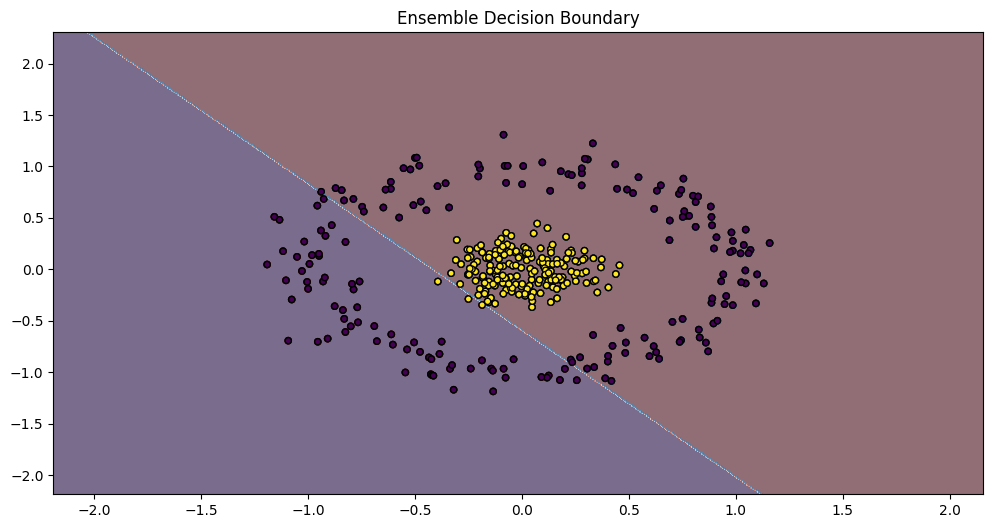

Parameters: {}, eta: 0.5, Accuracy: 0.7360, Error: 0.2640


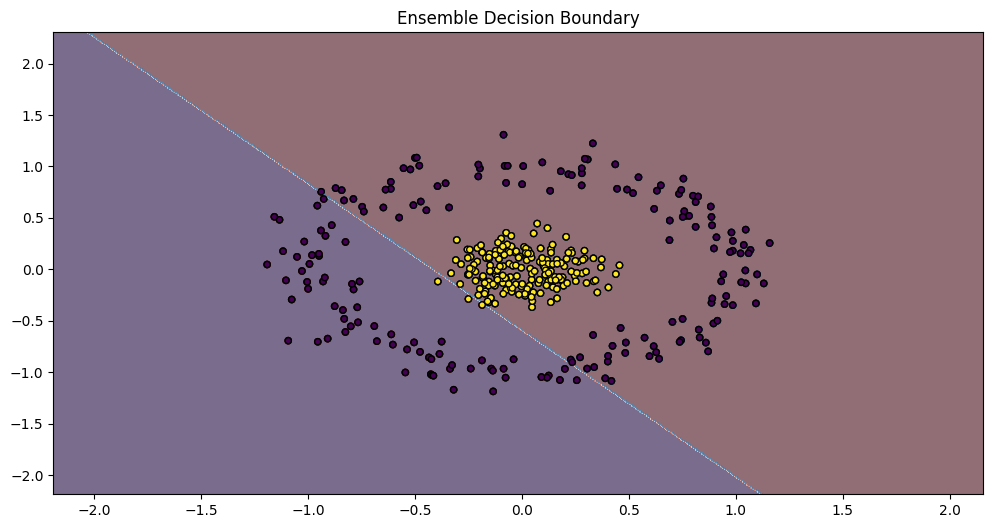

Parameters: {}, eta: 1, Accuracy: 0.7360, Error: 0.2640
Best eta for LDA: 0.1 with accuracy: 0.7360




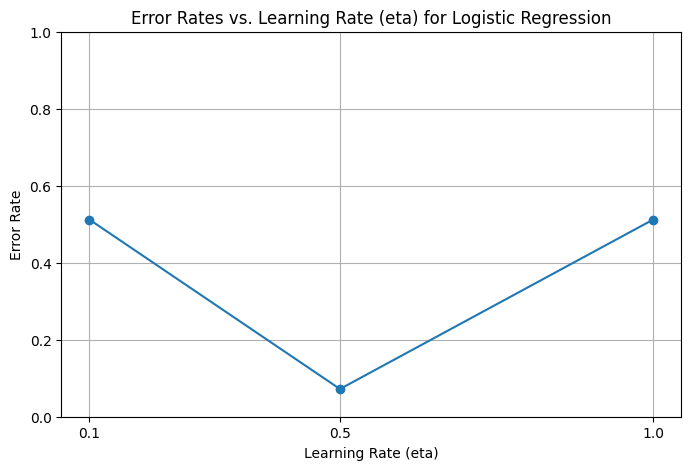

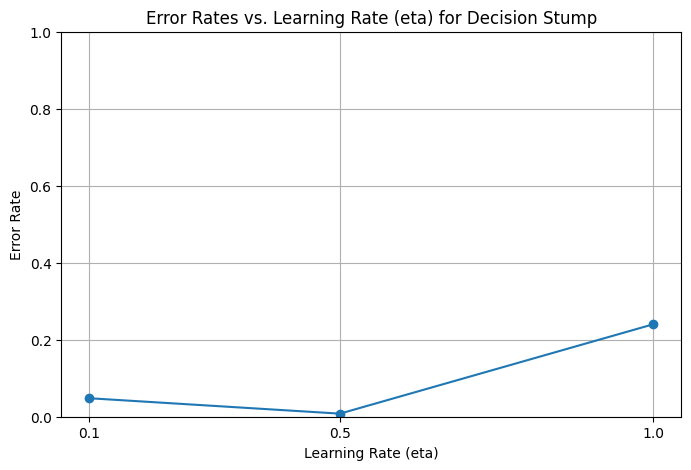

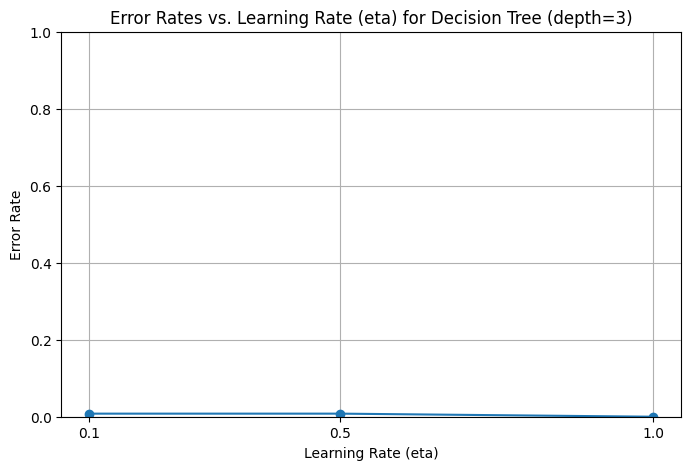

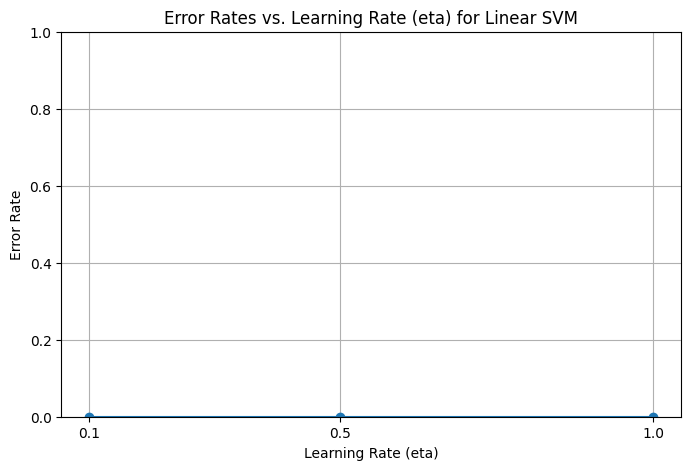

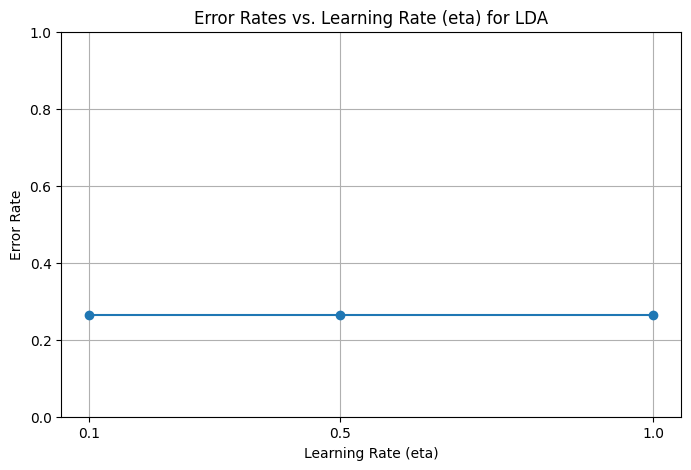

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generate the circles dataset
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Helper function to calculate weighted error
def weighted_error(y_true, y_pred, weights):
    return np.sum(weights * (y_true != y_pred))

# Adaboost implementation
class AdaBoost:
    def __init__(self, learner_name, weak_learner, T=50, eta=0.5):
        self.weak_learner = weak_learner
        self.learner_name = learner_name
        self.T = T
        self.eta = eta
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.full(n_samples, 1/n_samples)

        plt.figure(figsize=(12, 6))

        for t in range(self.T):
            model = self.weak_learner()
            if self.learner_name != "LDA":
                model.fit(X, y, sample_weight=weights)  # Always fit with sample weights
            else:
                model.fit(X, y)  # Always fit without sample weights
            y_pred = model.predict(X)
            # Compute the weighted error
            error = weighted_error(y, y_pred, weights) / np.sum(weights)
            alpha_t = self.eta * np.log((1 - error) / (error + 1e-10))
            self.alphas.append(alpha_t)
            self.models.append(model)

            # Update weights
            weights *= np.exp(-alpha_t * y * y_pred)
            weights /= np.sum(weights)  # Normalize

            # Plot the decision boundary after each iteration
            self.plot_classifier_fit(X, y, model, t + 1)

        self.plot_final_decision_boundary(X, y)

    def predict(self, X):
        final_pred = np.zeros(X.shape[0])
        for alpha, model in zip(self.alphas, self.models):
            final_pred += alpha * model.predict(X)
        return np.sign(final_pred)

    def plot_classifier_fit(self, X, y, model, iteration):
        """Plots classifier fit at every iteration without clearing previous iterations."""
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary of current iteration
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu, levels=[-1, 0, 1])
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
        plt.title(f'Classifier fit after {iteration} iterations')

    def plot_final_decision_boundary(self, X, y):
        """Plots the final ensembled decision boundary."""
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
        plt.title('Ensemble Decision Boundary')
        plt.show()

# Function to tune hyperparameters for a specific weak learner
def tune_hyperparameters(learner_name, weak_learner, param_grid):
    best_accuracy = 0
    best_params = None

    for params in param_grid:
        adaboost = AdaBoost(learner_name=learner_name, weak_learner=lambda: weak_learner(**params), T=50, eta=params.get('eta', 0.5))
        adaboost.fit(X_train, y_train)
        y_pred = adaboost.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params

    print(f"Best parameters for {learner_name}: {best_params} with accuracy: {best_accuracy:.4f}")

    return best_params  # Return best parameters

# Function to find the best eta using the best estimator
def tune_eta(learner_name, weak_learner, best_params, eta_values):
    best_accuracy = 0
    best_eta = None
    errors = []

    for eta in eta_values:
        adaboost = AdaBoost(learner_name=learner_name, weak_learner=lambda: weak_learner(**best_params), T=50, eta=eta)
        adaboost.fit(X_train, y_train)
        y_pred = adaboost.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error = 1 - accuracy

        errors.append((eta, error))  # Store eta and corresponding error

        print(f"Parameters: {best_params}, eta: {eta}, Accuracy: {accuracy:.4f}, Error: {error:.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_eta = eta

    print(f"Best eta for {learner_name}: {best_eta} with accuracy: {best_accuracy:.4f}")
    print("\n")

    return best_eta, errors  # Return best eta and errors for plotting

# Define weak learners with hyperparameter grids
weak_learners_params = {
    "Logistic Regression": lambda **params: LogisticRegression(solver='lbfgs', max_iter=1000, C=params.get('C', 1.0)),
    "Decision Stump": lambda **params: DecisionTreeClassifier(max_depth=1),
    "Decision Tree (depth=3)": lambda **params: DecisionTreeClassifier(max_depth=3),
    "Linear SVM": lambda **params: SVC(kernel='rbf', probability=True, C=params.get('C', 1)),
    "LDA": lambda **params: LinearDiscriminantAnalysis(),
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": [{'C': c} for c in [0.1, 1, 10]],
    "Decision Stump": [{}],
    "Decision Tree (depth=3)": [{}],
    "Linear SVM": [{'C': c} for c in [0.1, 1, 10]],
    "LDA": [{}],
}

# Eta values for tuning
eta_values = [0.1, 0.5, 1]

# Dictionary to hold best parameters and errors for plotting
all_best_params = {}
all_errors = {}

# Run tuning for each weak learner to find best hyperparameters and then best eta
for learner_name, weak_learner in weak_learners_params.items():
    print(f"Tuning hyperparameters for {learner_name}...")
    best_params = tune_hyperparameters(learner_name, weak_learner, param_grids[learner_name])

    print(f"Tuning eta for {learner_name} with best params: {best_params}...")
    best_eta, errors = tune_eta(learner_name, weak_learner, best_params, eta_values)

    all_best_params[learner_name] = (best_params, best_eta)  # Store best parameters and eta
    all_errors[learner_name] = errors  # Store errors for plotting

# Plotting separate error plots for each algorithm
for learner_name, errors in all_errors.items():
    plt.figure(figsize=(8, 5))
    eta_values = [error[0] for error in errors]
    error_rates = [error[1] for error in errors]

    plt.plot(eta_values, error_rates, marker='o')
    plt.title(f'Error Rates vs. Learning Rate (eta) for {learner_name}')
    plt.xlabel('Learning Rate (eta)')
    plt.ylabel('Error Rate')
    plt.xticks(np.unique(eta_values))  # Unique eta values
    plt.grid()
    plt.ylim(0, 1)
    plt.show()
